# Linear and polynomial regression

**Business case:**  John the ceo of the winery located in Vilafranca del Penedès wine company was really happy with the results regarding red wine. 

    "He has contacted us again because he wants to repeat the same procedure but, in that case for the white wines varieties that he has.

# Kindly reminder of the business case (`3.3.1.2.Linear-regression-on-RED-wine.ipynb`)

      John has to perform a lot of measurements (analysis) to each variety of wine. Among the measurements, the one related to Density which is extremely slow: it takes more than one day per sample! He has contacted us because he wants to know whether it could be possible to build a mathematical model in order to quantify this specific variable on new samples, considering other features from each wine. Building a model that may fit his interest will have important consecuencies for his business: he will save time, and MONEY!
      
      
      
**Key information:**
- `fixed acidity`: information regarding tartaric acid content (g / dm^3),most acids involved with wine or fixed or nonvolatile (do not evaporate readily). Range  [1- 30]
- `volatile acidity`: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste. Range [0-2]
- `citric acid`:found in small quantities, citric acid can add ‘freshness’ and flavor to wines. Range [0-1]
- `residual sugar`:the amount of sugar remaining after fermentation stops, it’s rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet. Range [0-20]
- `chlorides`: the amount of salt in the wine. Range [0-500]
- `free sulfur dioxide`: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine. Range [0-750]
- `total sulfur dioxide`:amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine. Range [0-250]
- `water_cont`:content of water in the wine. Range [0-100]
- `pH`:describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale. Range [0-14]
- `sulphates`:a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant. Range [0-5]
- `alcohol`:the percent alcohol content of the wine. Range [5-20]
- `quality`:quality of the wines based on sensory analysis. Range [1-10]
- `density`:the density of water is close to that of water depending on the percent alcohol and sugar content. Range [1-100]

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, RobustScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV, ElasticNet

%matplotlib inline

In [2]:
dataset = pd.read_csv('../datasets/winequality-white.csv', sep=';')
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,water_cont,pH,sulphates,alcohol,quality,density
0,"7,02","0,26","0,21","16,2","0,074",41,197,"0,998","3,02","0,5","9,8",3,10
1,"6,02","0,24","0,44","3,5","0,029",5,109,"0,9913","3,53","0,43","11,7",3,12
2,"7,02","0,59","0,38","1,6","0,066",34,182,"0,9968","3,23","0,38","8,5",3,14
3,"7,02","0,32","0,32",11,"0,038",16,66,"0,9937","3,24","0,4","11,5",3,13
4,"6,02","0,39","0,4","4,6","0,022",5,19,"0,9915","3,31","0,37","12,6",3,11


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   fixed acidity         4898 non-null   object
 1   volatile acidity      4898 non-null   object
 2   citric acid           4898 non-null   object
 3   residual sugar        4898 non-null   object
 4   chlorides             4898 non-null   object
 5   free sulfur dioxide   4898 non-null   object
 6   total sulfur dioxide  4898 non-null   object
 7   water_cont            4898 non-null   object
 8   pH                    4898 non-null   object
 9   sulphates             4898 non-null   object
 10  alcohol               4898 non-null   object
 11  quality               4898 non-null   int64 
 12  density               4898 non-null   int64 
dtypes: int64(2), object(11)
memory usage: 497.6+ KB


In [4]:
for column in dataset:
     if dataset[column].dtype == 'object': 
            dataset[column] = dataset[column].str.replace(',','.')
            dataset[column] = dataset[column].astype(float)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   water_cont            4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
 12  density               4898 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 497.6 KB


In [6]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,water_cont,pH,sulphates,alcohol,quality,density
0,7.02,0.26,0.21,16.2,0.074,41.0,197.0,0.9980,3.02,0.50,9.8,3,10
1,6.02,0.24,0.44,3.5,0.029,5.0,109.0,0.9913,3.53,0.43,11.7,3,12
2,7.02,0.59,0.38,1.6,0.066,34.0,182.0,0.9968,3.23,0.38,8.5,3,14
3,7.02,0.32,0.32,11.0,0.038,16.0,66.0,0.9937,3.24,0.40,11.5,3,13
4,6.02,0.39,0.40,4.6,0.022,5.0,19.0,0.9915,3.31,0.37,12.6,3,11


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   water_cont            4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
 12  density               4898 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 497.6 KB


In [8]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,water_cont,pH,sulphates,alcohol,quality,density
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.00000,4898.000000,4898.000000
mean,15.896480,0.278241,0.538067,6.589465,0.045770,35.301143,138.527460,0.994025,3.188265,2.531221,10.51492,5.877705,28.365047
std,5.513573,0.100795,14.270080,15.061426,0.021849,17.010119,44.243068,0.002990,0.151003,142.865064,1.23056,0.885726,6.422490
min,6.020000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.00000,3.000000,10.000000
25%,10.020000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991720,3.090000,0.410000,9.50000,5.000000,23.000000
50%,16.020000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993735,3.180000,0.470000,10.40000,6.000000,28.000000
75%,19.020000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.40000,6.000000,32.000000
max,32.020000,1.100000,999.000000,999.000000,0.346000,289.000000,999.000000,1.038980,3.820000,9999.000000,14.20000,9.000000,55.000000


In [9]:
dataset.duplicated().sum()

56

In [10]:
dataset = dataset.drop_duplicates()

In [11]:
dataset.reset_index(drop=True, inplace = True)

In [12]:
dataset.duplicated().sum()

0

In [13]:
dataset.shape

(4842, 13)

In [14]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,water_cont,pH,sulphates,alcohol,quality,density
0,7.02,0.26,0.21,16.2,0.074,41.0,197.0,0.9980,3.02,0.50,9.8,3,10
1,6.02,0.24,0.44,3.5,0.029,5.0,109.0,0.9913,3.53,0.43,11.7,3,12
2,7.02,0.59,0.38,1.6,0.066,34.0,182.0,0.9968,3.23,0.38,8.5,3,14
3,7.02,0.32,0.32,11.0,0.038,16.0,66.0,0.9937,3.24,0.40,11.5,3,13
4,6.02,0.39,0.40,4.6,0.022,5.0,19.0,0.9915,3.31,0.37,12.6,3,11


/Users/albagomez/opt/anaconda3/envs/DataAnalytics/lib/python3.7/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/albagomez/opt/anaconda3/envs/DataAnalytics/lib/python3.7/site-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


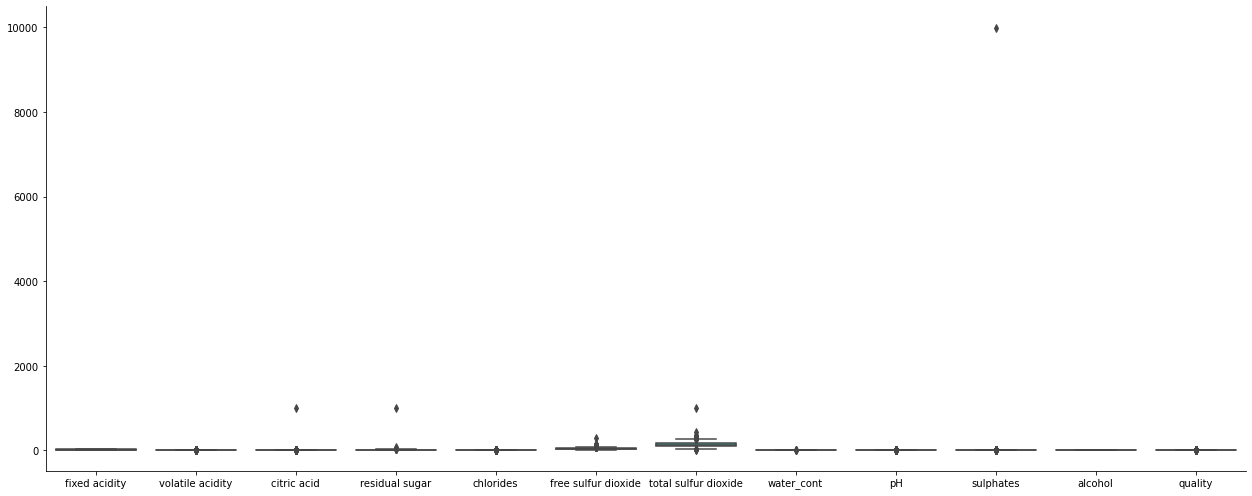

In [15]:
sns.factorplot(data=dataset.drop(['density'], axis=1) , 
               kind='box' , size=7, aspect=2.5);
plt.show()

In [16]:
# dataset['sulphates'].replace(9999, dataset['sulphates'].mean(), inplace=True)
dataset[dataset['sulphates'] == 9999]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,water_cont,pH,sulphates,alcohol,quality,density
30,8.02,0.64,0.08,999.0,0.062,26.0,142.0,0.9972,3.37,9999.0,8.9,4,16


In [17]:
dataset.drop(index=30, inplace=True)

In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4841 entries, 0 to 4841
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4841 non-null   float64
 1   volatile acidity      4841 non-null   float64
 2   citric acid           4841 non-null   float64
 3   residual sugar        4841 non-null   float64
 4   chlorides             4841 non-null   float64
 5   free sulfur dioxide   4841 non-null   float64
 6   total sulfur dioxide  4841 non-null   float64
 7   water_cont            4841 non-null   float64
 8   pH                    4841 non-null   float64
 9   sulphates             4841 non-null   float64
 10  alcohol               4841 non-null   float64
 11  quality               4841 non-null   int64  
 12  density               4841 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 529.5 KB


/Users/albagomez/opt/anaconda3/envs/DataAnalytics/lib/python3.7/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/albagomez/opt/anaconda3/envs/DataAnalytics/lib/python3.7/site-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


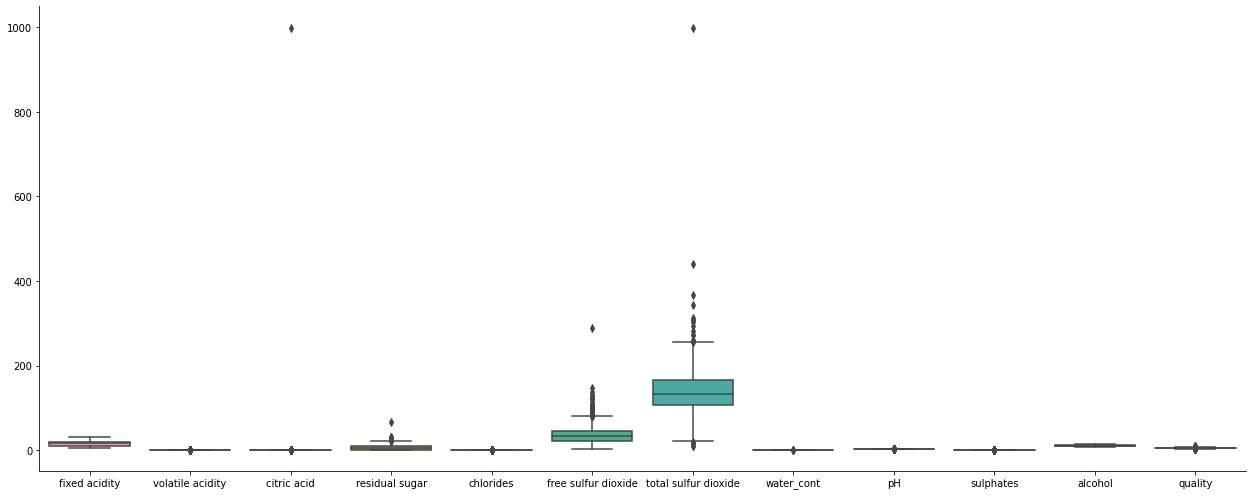

In [19]:
sns.factorplot(data=dataset.drop(['density'], axis=1) , 
               kind='box' , size=7, aspect=2.5);
plt.show()

In [20]:
dataset['citric acid'].describe()

count    4841.000000
mean        0.540847
std        14.353836
min         0.000000
25%         0.270000
50%         0.320000
75%         0.390000
max       999.000000
Name: citric acid, dtype: float64

In [21]:
# dataset['citric acid'].replace(999, dataset['citric acid'].mean(), inplace=True)
dataset[dataset['citric acid'] == 999]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,water_cont,pH,sulphates,alcohol,quality,density
25,8.02,0.32,999.0,5.1,0.044,19.0,65.0,0.991,3.03,0.41,12.6,4,16


In [22]:
dataset.drop(index=25, inplace=True)

In [23]:
dataset['total sulfur dioxide'].describe()

count    4840.000000
mean      138.392045
std        44.220681
min         9.000000
25%       108.000000
50%       134.000000
75%       167.000000
max       999.000000
Name: total sulfur dioxide, dtype: float64

<AxesSubplot:>

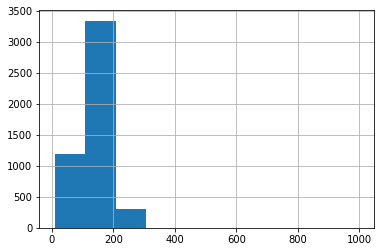

In [24]:
dataset['total sulfur dioxide'].hist()

In [25]:
# dataset['total sulfur dioxide'].replace(999, dataset['total sulfur dioxide'].mean(), inplace=True)
dataset[dataset['total sulfur dioxide'] == 999]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,water_cont,pH,sulphates,alcohol,quality,density
32,7.02,0.36,0.38,0.9,0.037,3.0,999.0,0.9904,3.28,0.34,11.4,4,17


In [26]:
dataset.drop(index=32, inplace=True)

/Users/albagomez/opt/anaconda3/envs/DataAnalytics/lib/python3.7/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/albagomez/opt/anaconda3/envs/DataAnalytics/lib/python3.7/site-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


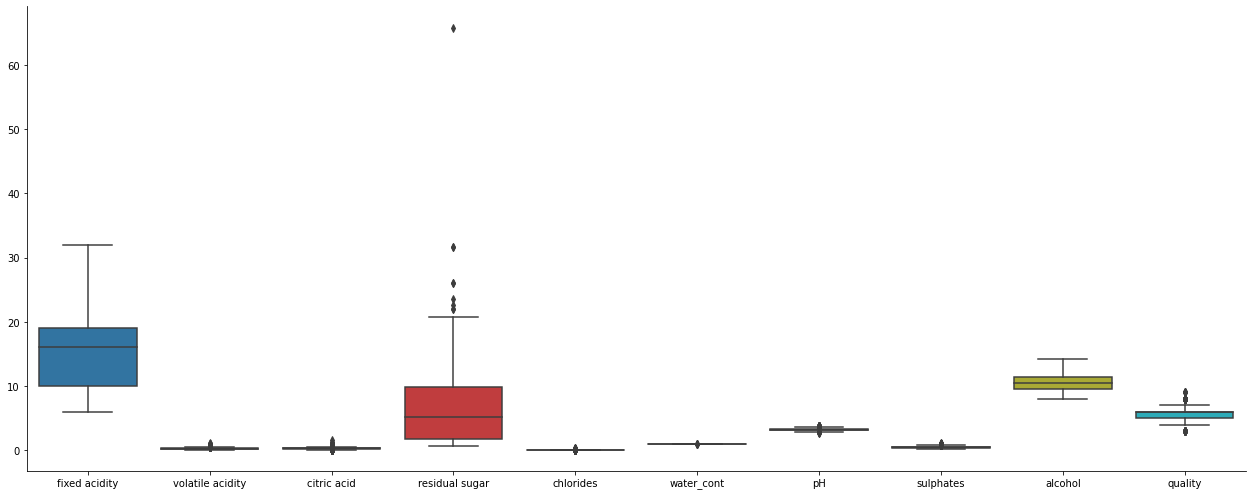

In [27]:
sns.factorplot(data=dataset.drop(['density', 'total sulfur dioxide', 'free sulfur dioxide'], axis=1) , 
               kind='box' , size=7, aspect=2.5);
plt.show()

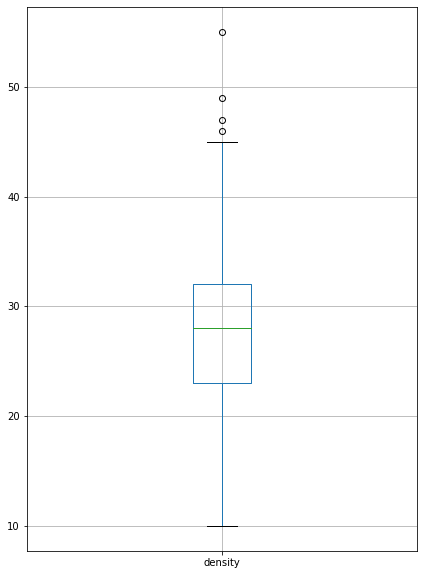

In [28]:
fig = plt.figure(figsize=(7,10))
dataset.boxplot(column=['density'])
plt.show()

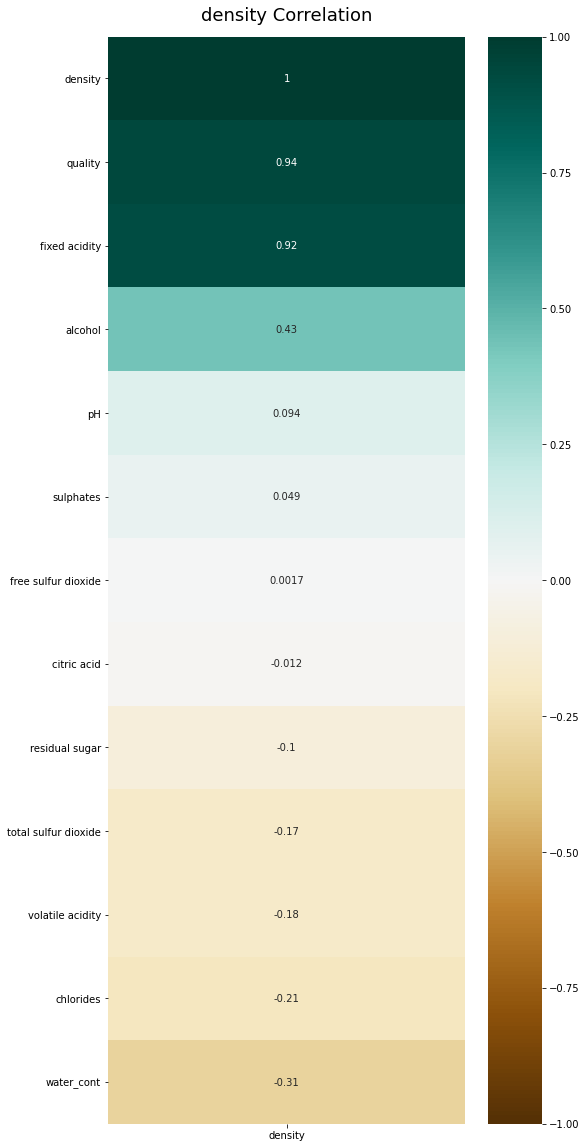

In [29]:
# Let's do a final check to see which columns have the higher correlation with the score. 
plt.figure(figsize=(8, 20))

heatmap = sns.heatmap(dataset.corr()[['density']].sort_values(by='density', ascending=False), 
                      vmin=-1, 
                      vmax=1, 
                      annot=True, 
                      cmap='BrBG')

heatmap.set_title('density Correlation', fontdict={'fontsize':18}, pad=16);

In [30]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4839 entries, 0 to 4841
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4839 non-null   float64
 1   volatile acidity      4839 non-null   float64
 2   citric acid           4839 non-null   float64
 3   residual sugar        4839 non-null   float64
 4   chlorides             4839 non-null   float64
 5   free sulfur dioxide   4839 non-null   float64
 6   total sulfur dioxide  4839 non-null   float64
 7   water_cont            4839 non-null   float64
 8   pH                    4839 non-null   float64
 9   sulphates             4839 non-null   float64
 10  alcohol               4839 non-null   float64
 11  quality               4839 non-null   int64  
 12  density               4839 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 529.3 KB


In [31]:
dataset.reset_index(inplace=True, drop=True)

## Linear regression with raw data

In [32]:
y_linear = dataset['density']

X_linear = dataset['quality']

In [33]:
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(X_linear, y_linear,
                                                    test_size = 0.33,
                                                    random_state = 7)

In [34]:
print('Shape of the raw data (X): {}'.format (X_linear.shape))
print('Shape of the TARGET variable (y): {}'.format (y_linear.shape))

print('\nShape of the Train data (X_train): {}'.format (X_train_l.shape))
print('Shape of the Train data (y_train): {}'.format (y_train_l.shape))

print('\nShape of the Test data (X_test): {}'.format (X_test_l.shape))
print('Shape of the TARGET Test data (y_test): {}'.format (y_test_l.shape))

Shape of the raw data (X): (4839,)
Shape of the TARGET variable (y): (4839,)

Shape of the Train data (X_train): (3242,)
Shape of the Train data (y_train): (3242,)

Shape of the Test data (X_test): (1597,)
Shape of the TARGET Test data (y_test): (1597,)


In [35]:
y_train_l =  np.array(y_train_l).reshape(-1, 1)  # values converts it into 
# a numpy array
X_train_l = np.array(X_train_l).reshape(-1, 1) 

y_test_l =  np.array(y_test_l).reshape(-1, 1)  # values converts it into a 
#numpy array
X_test_l = np.array(X_test_l).reshape(-1, 1) 

In [36]:
# Instantiate the model
linear_m = LinearRegression()

# Train the model
linear_m.fit(X_train_l, y_train_l)

LinearRegression()

In [37]:
y_pred_l = linear_m.predict(X_test_l)
y_pred_l

array([[22.37368631],
       [29.22407352],
       [36.07446074],
       ...,
       [29.22407352],
       [15.52329909],
       [22.37368631]])

In [38]:
accuracy_l = linear_m.score(X_test_l, y_test_l)
print('Accuracy = '+ str(accuracy_l))

Accuracy = 0.9061684778458526


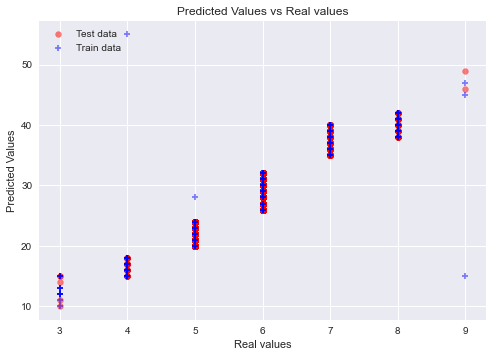

In [39]:
plt.style.use('seaborn')
plt.scatter(X_test_l, y_test_l, color = 'red', 
            marker = 'o', s = 35, alpha = 0.5,
          label = 'Test data')

plt.scatter(X_train_l, y_train_l, color = 'blue', 
            marker = '+', s = 35, alpha = 0.5,
          label = 'Train data')
#plt.plot(X_train, linear_m.predict(X_train), color = 'blue', label='Model Plot')

plt.title('Predicted Values vs Real values')
plt.xlabel('Real values')
plt.ylabel('Predicted Values')
plt.legend(loc = 'upper left')
plt.show()

In [40]:
# TEST set
MAE_l = metrics.mean_absolute_error(y_test_l, y_pred_l)
MSE_l = metrics.mean_squared_error(y_test_l, y_pred_l)
RMSE_l = np.sqrt(metrics.mean_squared_error(y_test_l, y_pred_l))
R2_l = r2_score(y_test_l, y_pred_l)

print('MAE:', MAE_l)
print('MSE:', MSE_l)
print('RMSE:', round(RMSE_l,3))
print('R2 Score:', R2_l)

MAE: 1.6367041804397349
MSE: 3.806848415040902
RMSE: 1.951
R2 Score: 0.9061684778458526


## Multinear regression with raw data

In [41]:
y_m = dataset['density']

X_m = dataset.drop(columns='density', axis=1)

In [42]:
X_m.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,water_cont,pH,sulphates,alcohol,quality
0,7.02,0.26,0.21,16.2,0.074,41.0,197.0,0.9980,3.02,0.50,9.8,3
1,6.02,0.24,0.44,3.5,0.029,5.0,109.0,0.9913,3.53,0.43,11.7,3
2,7.02,0.59,0.38,1.6,0.066,34.0,182.0,0.9968,3.23,0.38,8.5,3
3,7.02,0.32,0.32,11.0,0.038,16.0,66.0,0.9937,3.24,0.40,11.5,3
4,6.02,0.39,0.40,4.6,0.022,5.0,19.0,0.9915,3.31,0.37,12.6,3


In [43]:
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_m, y_m, 
                                                    test_size = 0.33, 
                                                    random_state = 42)

In [44]:
regressor = LinearRegression()
regressor.fit(X_train_m, y_train_m)

LinearRegression()

In [45]:
y_pred_m = regressor.predict(X_test_m)
y_pred_m

array([29.2813139 , 29.08979467, 35.29554476, ..., 22.09878936,
       21.9693568 , 28.6034293 ])

In [46]:
y_pred_train_m = regressor.predict(X_train_m)
y_pred_train_m

array([29.17446981, 35.82412154, 36.68345896, ..., 29.50608732,
       29.90178145, 21.95012872])

In [47]:
regressor.coef_

array([ 2.18928789e-01,  8.53092930e-02, -3.23338463e-02,  1.69105433e-02,
       -3.41782090e+00, -1.69079217e-03,  1.33892475e-03, -8.65164938e+01,
       -4.56045130e-02,  1.62863468e-01, -6.29670393e-02,  5.52917072e+00])

In [48]:
accuracy_m = regressor.score(X_test_m, y_test_m)
print('Accuracy = '+ str(accuracy_m))

Accuracy = 0.895901318180836


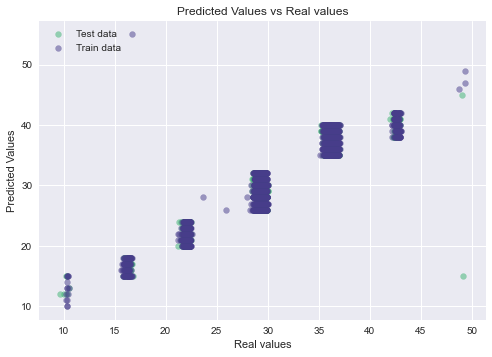

In [49]:
plt.style.use('seaborn')

y_pred1 = y_pred_m
y_test1 = y_test_m
y_pred_train1 = y_pred_train_m
y_train1 = y_train_m

plt.scatter(y_pred_m, y_test_m, color = 'mediumseagreen', marker = 'o', s = 35, alpha = 0.5,
          label = 'Test data')

plt.scatter(y_pred_train_m, y_train_m, color = 'darkslateblue', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')

plt.title('Predicted Values vs Real values')
plt.xlabel('Real values')
plt.ylabel('Predicted Values')
plt.legend(loc = 'upper left')
plt.show()

In [50]:
# TEST set
MAE_l = metrics.mean_absolute_error(y_test_m, y_pred_m)
MSE_l = metrics.mean_squared_error(y_test_m, y_pred_m)
RMSE_l = np.sqrt(metrics.mean_squared_error(y_test_m, y_pred_m))
R2_l = r2_score(y_test_m, y_pred_m)

print('MAE:', MAE_l)
print('MSE:', MSE_l)
print('RMSE:', round(RMSE_l,3))
print('R2 Score:', R2_l)

MAE: 1.6039077236817543
MSE: 4.307616171271434
RMSE: 2.075
R2 Score: 0.895901318180836


In [51]:
# Exercise 2. What happens to the model if we transform the data? (MinMax Scaler, Standardize...)
# Try to transform the raw data, repeat the model building and extract some conclusions 

# Scaling

In [52]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,water_cont,pH,sulphates,alcohol,quality,density
0,7.02,0.26,0.21,16.2,0.074,41.0,197.0,0.9980,3.02,0.50,9.8,3,10
1,6.02,0.24,0.44,3.5,0.029,5.0,109.0,0.9913,3.53,0.43,11.7,3,12
2,7.02,0.59,0.38,1.6,0.066,34.0,182.0,0.9968,3.23,0.38,8.5,3,14
3,7.02,0.32,0.32,11.0,0.038,16.0,66.0,0.9937,3.24,0.40,11.5,3,13
4,6.02,0.39,0.40,4.6,0.022,5.0,19.0,0.9915,3.31,0.37,12.6,3,11


In [53]:
dataset["quality"].value_counts()

6    2178
5    1428
7     874
8     174
4     160
3      20
9       5
Name: quality, dtype: int64

In [54]:
dataset["density"].value_counts().sort_values(ascending=True)

55      1
47      1
14      1
45      1
49      1
46      1
10      2
11      2
13      4
12      5
42     30
16     36
18     38
41     40
17     43
15     49
37    127
36    150
35    156
40    170
38    176
39    199
22    269
23    278
24    286
20    287
31    301
29    304
21    307
26    309
28    312
27    313
32    319
30    321
Name: density, dtype: int64

In [55]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4839 entries, 0 to 4838
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4839 non-null   float64
 1   volatile acidity      4839 non-null   float64
 2   citric acid           4839 non-null   float64
 3   residual sugar        4839 non-null   float64
 4   chlorides             4839 non-null   float64
 5   free sulfur dioxide   4839 non-null   float64
 6   total sulfur dioxide  4839 non-null   float64
 7   water_cont            4839 non-null   float64
 8   pH                    4839 non-null   float64
 9   sulphates             4839 non-null   float64
 10  alcohol               4839 non-null   float64
 11  quality               4839 non-null   int64  
 12  density               4839 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 491.6 KB


In [56]:
data = dataset.copy()

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4839 entries, 0 to 4838
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4839 non-null   float64
 1   volatile acidity      4839 non-null   float64
 2   citric acid           4839 non-null   float64
 3   residual sugar        4839 non-null   float64
 4   chlorides             4839 non-null   float64
 5   free sulfur dioxide   4839 non-null   float64
 6   total sulfur dioxide  4839 non-null   float64
 7   water_cont            4839 non-null   float64
 8   pH                    4839 non-null   float64
 9   sulphates             4839 non-null   float64
 10  alcohol               4839 non-null   float64
 11  quality               4839 non-null   int64  
 12  density               4839 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 491.6 KB


In [58]:
# Step 1. Instantiate the model (label encoding)
lb_make = LabelEncoder() 

# Step 2. Fit the variable to the instatiated model
data['quality'] = lb_make.fit_transform(data['quality'])

data.head() #Results in appending a new column to df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,water_cont,pH,sulphates,alcohol,quality,density
0,7.02,0.26,0.21,16.2,0.074,41.0,197.0,0.9980,3.02,0.50,9.8,0,10
1,6.02,0.24,0.44,3.5,0.029,5.0,109.0,0.9913,3.53,0.43,11.7,0,12
2,7.02,0.59,0.38,1.6,0.066,34.0,182.0,0.9968,3.23,0.38,8.5,0,14
3,7.02,0.32,0.32,11.0,0.038,16.0,66.0,0.9937,3.24,0.40,11.5,0,13
4,6.02,0.39,0.40,4.6,0.022,5.0,19.0,0.9915,3.31,0.37,12.6,0,11


## Robust Scaler

In [59]:
# Initialise the Scaler 
scaler = RobustScaler() 
scaler
# Scale data 
data2 = data.drop(columns = ["quality"])
dfname = data2.columns
data_Rscaled = scaler.fit_transform(data2)
data_Rscaled
data_Rscaled = pd.DataFrame(data_Rscaled, columns=dfname)

In [60]:
data_Rscaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4839 entries, 0 to 4838
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4839 non-null   float64
 1   volatile acidity      4839 non-null   float64
 2   citric acid           4839 non-null   float64
 3   residual sugar        4839 non-null   float64
 4   chlorides             4839 non-null   float64
 5   free sulfur dioxide   4839 non-null   float64
 6   total sulfur dioxide  4839 non-null   float64
 7   water_cont            4839 non-null   float64
 8   pH                    4839 non-null   float64
 9   sulphates             4839 non-null   float64
 10  alcohol               4839 non-null   float64
 11  density               4839 non-null   float64
dtypes: float64(12)
memory usage: 453.8 KB


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4839 entries, 0 to 4838
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4839 non-null   float64
 1   volatile acidity      4839 non-null   float64
 2   citric acid           4839 non-null   float64
 3   residual sugar        4839 non-null   float64
 4   chlorides             4839 non-null   float64
 5   free sulfur dioxide   4839 non-null   float64
 6   total sulfur dioxide  4839 non-null   float64
 7   water_cont            4839 non-null   float64
 8   pH                    4839 non-null   float64
 9   sulphates             4839 non-null   float64
 10  alcohol               4839 non-null   float64
 11  quality               4839 non-null   int64  
 12  density               4839 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 491.6 KB


In [62]:
data_scaled = pd.concat([data_Rscaled, data[['quality']]], axis=1)
data_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,water_cont,pH,sulphates,alcohol,density,quality
0,-1.000000,0.000000,-0.916667,1.370370,2.214286,0.304348,1.067797,0.978385,-0.842105,0.214286,-0.315789,-2.000000,0
1,-1.111111,-0.181818,1.000000,-0.197531,-1.000000,-1.260870,-0.423729,-0.546075,1.842105,-0.285714,0.684211,-1.777778,0
2,-1.000000,3.000000,0.500000,-0.432099,1.642857,0.000000,0.813559,0.705347,0.263158,-0.642857,-1.000000,-1.555556,0
3,-1.000000,0.545455,0.000000,0.728395,-0.357143,-0.782609,-1.152542,0.000000,0.315789,-0.500000,0.578947,-1.666667,0
4,-1.111111,1.181818,0.666667,-0.061728,-1.500000,-1.260870,-1.949153,-0.500569,0.684211,-0.714286,1.157895,-1.888889,0


In [63]:
data_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4839 entries, 0 to 4838
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4839 non-null   float64
 1   volatile acidity      4839 non-null   float64
 2   citric acid           4839 non-null   float64
 3   residual sugar        4839 non-null   float64
 4   chlorides             4839 non-null   float64
 5   free sulfur dioxide   4839 non-null   float64
 6   total sulfur dioxide  4839 non-null   float64
 7   water_cont            4839 non-null   float64
 8   pH                    4839 non-null   float64
 9   sulphates             4839 non-null   float64
 10  alcohol               4839 non-null   float64
 11  density               4839 non-null   float64
 12  quality               4839 non-null   int64  
dtypes: float64(12), int64(1)
memory usage: 491.6 KB


## Linear Regression with scaled data

In [64]:
data_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4839 entries, 0 to 4838
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4839 non-null   float64
 1   volatile acidity      4839 non-null   float64
 2   citric acid           4839 non-null   float64
 3   residual sugar        4839 non-null   float64
 4   chlorides             4839 non-null   float64
 5   free sulfur dioxide   4839 non-null   float64
 6   total sulfur dioxide  4839 non-null   float64
 7   water_cont            4839 non-null   float64
 8   pH                    4839 non-null   float64
 9   sulphates             4839 non-null   float64
 10  alcohol               4839 non-null   float64
 11  density               4839 non-null   float64
 12  quality               4839 non-null   int64  
dtypes: float64(12), int64(1)
memory usage: 491.6 KB


In [65]:
y = data_scaled['density']

X = data_scaled['quality']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.33,
                                                    random_state = 7)

In [67]:
print('Shape of the raw data (X): {}'.format (X.shape))
print('Shape of the TARGET variable (y): {}'.format (y.shape))

print('\nShape of the Train data (X_train): {}'.format (X_train.shape))
print('Shape of the Train data (y_train): {}'.format (y_train.shape))

print('\nShape of the Test data (X_test): {}'.format (X_test.shape))
print('Shape of the TARGET Test data (y_test): {}'.format (y_test.shape))

Shape of the raw data (X): (4839,)
Shape of the TARGET variable (y): (4839,)

Shape of the Train data (X_train): (3242,)
Shape of the Train data (y_train): (3242,)

Shape of the Test data (X_test): (1597,)
Shape of the TARGET Test data (y_test): (1597,)


In [68]:
y_train =  np.array(y_train).reshape(-1, 1)  # values converts it into 
# a numpy array
X_train = np.array(X_train).reshape(-1, 1) 

y_test =  np.array(y_test).reshape(-1, 1)  # values converts it into a 
#numpy array
X_test = np.array(X_test).reshape(-1, 1) 

In [69]:
X_train

array([[6],
       [3],
       [3],
       ...,
       [2],
       [2],
       [4]])

In [70]:
# Instantiate the model
linear_m = LinearRegression()

# Train the model
linear_m.fit(X_train, y_train)

LinearRegression()

In [71]:
y_pred = linear_m.predict(X_test)
y_pred

array([[-0.62514597],
       [ 0.13600817],
       [ 0.8971623 ],
       ...,
       [ 0.13600817],
       [-1.3863001 ],
       [-0.62514597]])

In [72]:
accuracy = linear_m.score(X_test, y_test)
print('Accuracy = '+ str(accuracy))

Accuracy = 0.9061684778458527


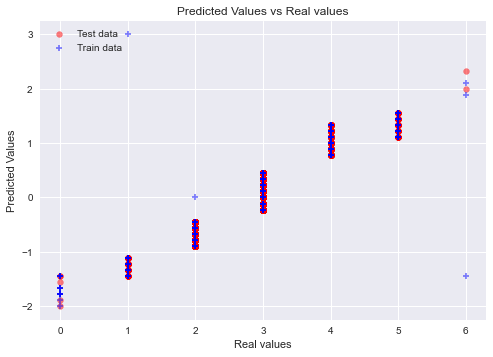

In [73]:
plt.style.use('seaborn')
plt.scatter(X_test, y_test, color = 'red', 
            marker = 'o', s = 35, alpha = 0.5,
          label = 'Test data')

plt.scatter(X_train, y_train, color = 'blue', 
            marker = '+', s = 35, alpha = 0.5,
          label = 'Train data')
#plt.plot(X_train, linear_m.predict(X_train), color = 'blue', label='Model Plot')

plt.title('Predicted Values vs Real values')
plt.xlabel('Real values')
plt.ylabel('Predicted Values')
plt.legend(loc = 'upper left')
plt.show()

In [74]:
# TEST set
MAE_l = metrics.mean_absolute_error(y_test, y_pred)
MSE_l = metrics.mean_squared_error(y_test, y_pred)
RMSE_l = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
R2_l = r2_score(y_test, y_pred)

print('MAE:', MAE_l)
print('MSE:', MSE_l)
print('RMSE:', round(RMSE_l,3))
print('R2 Score:', R2_l)

MAE: 0.18185602004885942
MSE: 0.04699812858075184
RMSE: 0.217
R2 Score: 0.9061684778458527


In [75]:
from sklearn.model_selection import cross_val_score
import math

cv_reg_model = LinearRegression() #Let's initialize the method 

cv_scores = cross_val_score(cv_reg_model, X_train, y_train,
                            cv=10, scoring='r2') # Let's define the cv and 

print('Cross Validation R2_score: {}'.format(cv_scores.round(2)))

#cv_scores = np.mean(cv_scores).round(3)
#print("\nAverage 10-Fold CV R2_score: {}".format(cv_scores))

Cross Validation R2_score: [0.8  0.82 0.89 0.9  0.91 0.91 0.91 0.9  0.9  0.9 ]


In [76]:
# Let's calculate the metrics with our TRAIN dataset
y_predTrain = linear_m.predict(X_train)

MAE_lTrain = metrics.mean_absolute_error(y_train, y_predTrain)
MSE_lTrain = metrics.mean_squared_error(y_train,y_predTrain)
RMSE_lTrain = np.sqrt(metrics.mean_squared_error(y_train, y_predTrain))
R2_lTrain = r2_score(y_train, y_predTrain)

print('\n TRAIN metrics\n')
print('MAE:', round(MAE_lTrain,3))
print('MSE:', round(MSE_lTrain,3))
print('RMSE:', round(RMSE_lTrain,3))
print('R2 Score:', round(R2_lTrain,3))

print('\n CV- TRAIN metrics\n')
print('R2 Score:', cv_scores)
print("\nAverage 10-Fold CV R2_score: {}".format(np.mean(cv_scores).round(3)))


print('\n TEST metrics\n')
print('MAE:', round(MAE_l,3))
print('MSE:', round(MSE_l,3))
print('RMSE:', round(RMSE_l,3))
print('R2 Score:', round(R2_l,3))


 TRAIN metrics

MAE: 0.188
MSE: 0.059
RMSE: 0.243
R2 Score: 0.885

 CV- TRAIN metrics

R2 Score: [0.80489443 0.81551988 0.89452784 0.90226552 0.91091896 0.90899123
 0.91111366 0.90192701 0.90303204 0.89941116]

Average 10-Fold CV R2_score: 0.885

 TEST metrics

MAE: 0.182
MSE: 0.047
RMSE: 0.217
R2 Score: 0.906


## Multiple Linear Regression

In [77]:
X_multi = data_scaled.drop(['density'], axis = 1)
y_multi = data_scaled['density']

In [78]:
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, 
                                                    test_size = 0.33, 
                                                    random_state = 42)

In [79]:
regressor = LinearRegression()
regressor.fit(X_train_multi, y_train_multi)

LinearRegression()

In [80]:
y_pred_multi = regressor.predict(X_test_multi)
y_pred_multi

array([ 0.14236821,  0.1210883 ,  0.81061608, ..., -0.65569007,
       -0.67007147,  0.0670477 ])

In [81]:
y_pred_train_multi = regressor.predict(X_train_multi)
y_pred_train_multi

array([ 0.13049665,  0.86934684,  0.96482877, ...,  0.16734304,
        0.21130905, -0.67220792])

In [82]:
accuracy_multi = regressor.score(X_test_multi, y_test_multi)
print('Accuracy = '+ str(accuracy_multi))

Accuracy = 0.8959013181808361


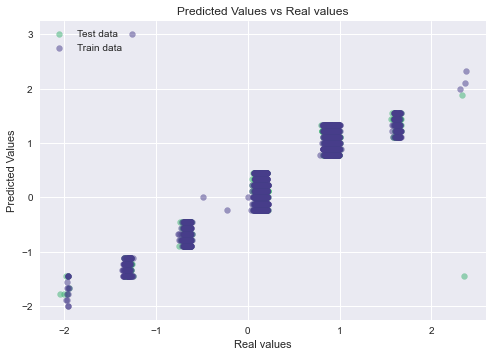

In [83]:
plt.style.use('seaborn')

y_pred1 = y_pred_multi
y_test1 = y_test_multi
y_pred_train1 = y_pred_train_multi
y_train1 = y_train_multi

plt.scatter(y_pred_multi, y_test_multi, color = 'mediumseagreen', marker = 'o', s = 35, alpha = 0.5,
          label = 'Test data')

plt.scatter(y_pred_train_multi, y_train_multi, color = 'darkslateblue', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')

plt.title('Predicted Values vs Real values')
plt.xlabel('Real values')
plt.ylabel('Predicted Values')
plt.legend(loc = 'upper left')
plt.show()

In [84]:
df_results = pd.DataFrame({'MReg_Real': y_test_multi, 'MReg_Predicted': y_pred_multi.flatten()})
print(df_results)

      MReg_Real  MReg_Predicted
3199  -0.222222        0.142368
2527   0.111111        0.121088
4100   1.222222        0.810616
1926   0.222222        0.158505
1536  -0.888889       -0.648239
...         ...             ...
932   -0.666667       -0.642499
439   -0.555556       -0.671737
1313  -0.888889       -0.655690
678   -0.555556       -0.670071
1756   0.333333        0.067048

[1597 rows x 2 columns]


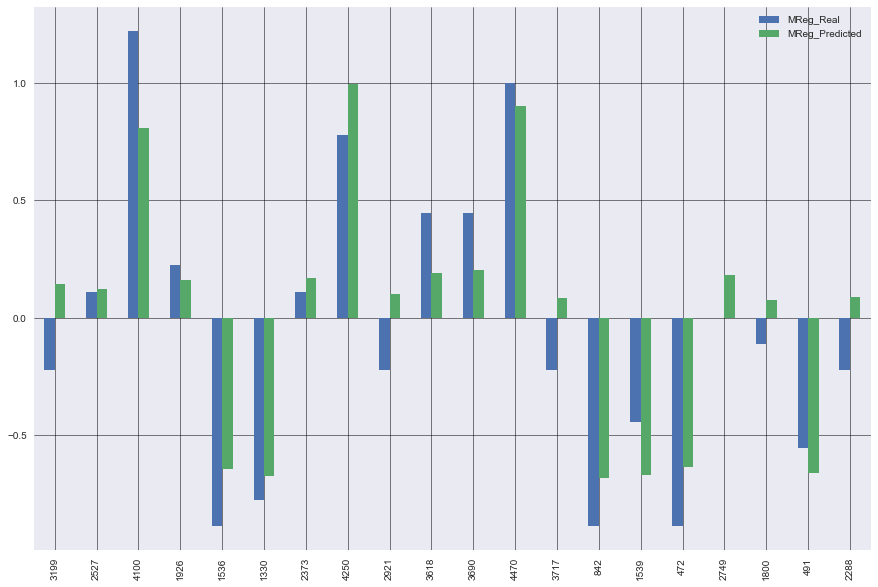

In [85]:
df1 = df_results.head(20)
df1.plot(kind='bar',figsize=(15,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [86]:
# TEST set
MAE_l = metrics.mean_absolute_error(y_test_multi, y_pred_multi)
MSE_l = metrics.mean_squared_error(y_test_multi, y_pred_multi)
RMSE_l = np.sqrt(metrics.mean_squared_error(y_test_multi, y_pred_multi))
R2_l = r2_score(y_test_multi, y_pred_multi)

print('MAE:', MAE_l)
print('MSE:', MSE_l)
print('RMSE:', round(RMSE_l,3))
print('R2 Score:', R2_l)

MAE: 0.17821196929797264
MSE: 0.05318044655890654
RMSE: 0.231
R2 Score: 0.8959013181808361


In [87]:
from sklearn.model_selection import cross_val_score
import math

cv_reg_model = LinearRegression() #Let's initialize the method 
cv_scores = cross_val_score(cv_reg_model, X_train_multi, y_train_multi,
                            cv=10, scoring='r2') # Let's define the K and the 

print('Cross Validation R2_score: {}'.format(cv_scores.round(2)))

cv_scores = np.mean(cv_scores).round(3)
print("\nAverage 10-Fold CV R2_score: {}".format(cv_scores))

Cross Validation R2_score: [0.91 0.91 0.9  0.91 0.92 0.91 0.81 0.89 0.9  0.9 ]

Average 10-Fold CV R2_score: 0.895


In [88]:
# Let's calculate the metrics with our TRAIN dataset
y_predTrain = regressor.predict(X_train_multi)

MAE_lTrain = metrics.mean_absolute_error(y_train_multi, y_predTrain)
MSE_lTrain = metrics.mean_squared_error(y_train_multi,y_predTrain)
RMSE_lTrain = np.sqrt(metrics.mean_squared_error(y_train_multi, y_predTrain))
R2_lTrain = r2_score(y_train_multi, y_predTrain)

print('\n TRAIN metrics\n')
print('MAE:', round(MAE_lTrain,3))
print('MSE:', round(MSE_lTrain,3))
print('RMSE:', round(RMSE_lTrain,3))
print('R2 Score:', round(R2_lTrain,3))

print('\n CV- TRAIN metrics\n')
print('R2 Score:', cv_scores)

print('\n TEST metrics\n')
print('MAE:', round(MAE_l,3))
print('MSE:', round(MSE_l,3))
print('RMSE:', round(RMSE_l,3))
print('R2 Score:', round(R2_l,3))


 TRAIN metrics

MAE: 0.184
MSE: 0.053
RMSE: 0.23
R2 Score: 0.896

 CV- TRAIN metrics

R2 Score: 0.895

 TEST metrics

MAE: 0.178
MSE: 0.053
RMSE: 0.231
R2 Score: 0.896


# Model 1: Ridge Regression

In [89]:
# Create ridge regression with three possible alpha values
regr_cv = RidgeCV(alphas=[0.1,0.5, 1.0, 10.0])
regr_cv

RidgeCV(alphas=array([ 0.1,  0.5,  1. , 10. ]))

In [90]:
# Fit the linear regression
model_cv = regr_cv.fit(X_train_multi, y_train_multi)
model_cv

RidgeCV(alphas=array([ 0.1,  0.5,  1. , 10. ]))

In [91]:
#View Best Model’s Alpha Value
model_cv.alpha_

1.0

In [92]:
regr_cv = RidgeCV(alphas=[1,2,5])

In [93]:
# Fit the linear regression
model_cv = regr_cv.fit(X_train_multi, y_train_multi)

#View Best Model’s Alpha Value
model_cv.alpha_

5

In [94]:
rr_ = Ridge(alpha = model_cv.alpha_)# higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely
# restricted and in this case linear and ridge regression resembles

rr_.fit(X_train_multi, y_train_multi)

Ridge(alpha=5)

In [95]:
# Execute this line (of course, modifying the path)
import sys
sys.path.insert(0, '../_functions_/')
#print(sys.path)

In [96]:
from fx_MLRegression import *

In [97]:
metrics_train(X_train_multi, y_train_multi, rr_)

,MAE,MSE,RMSE,R2,CV_R2
Train,0.183824,0.052865,0.229923,0.895703,0.895


In [98]:
metrics_test(X_test_multi, y_test_multi, rr_)

,MAE,MSE,RMSE,R2,CV_R2
Test,0.178214,0.053157,0.230558,0.895947,0.896


In [99]:
Allmetrics(rr_, X_train_multi, y_train_multi, X_test_multi, y_test_multi)

,MAE,MSE,RMSE,R2,CV_R2
Train,0.183824,0.052865,0.229923,0.895703,0.895
Test,0.178214,0.053157,0.230558,0.895947,0.896


In [100]:
rr_metrics = Allmetrics(rr_, X_train_multi, y_train_multi, X_test_multi, y_test_multi)

In [101]:
# Visualitzation of the model performance

y_predRR = rr_.predict(X_test_multi)

y_predRR

array([ 0.14279457,  0.12171357,  0.80665906, ..., -0.65573569,
       -0.66981458,  0.06623961])

In [102]:
#Let's create a dataframe containing the real and predicted values_

y_pred_a = pd.DataFrame(y_predRR)
y_pred_a

,0
0,0.142795
1,0.121714
2,0.806659
3,0.159154
4,-0.646877
...,...
1592,-0.640664
1593,-0.672226
1594,-0.655736
1595,-0.669815


In [103]:
y_test_a = y_test_multi.reset_index(drop=True, inplace=False)
y_test_a

0      -0.222222
1       0.111111
2       1.222222
3       0.222222
4      -0.888889
          ...   
1592   -0.666667
1593   -0.555556
1594   -0.888889
1595   -0.555556
1596    0.333333
Name: density, Length: 1597, dtype: float64

In [104]:
# We create a new dataframe containing both the real (y_test) and the predicted value by the model (y_pred)
pred_act_df = pd.concat([y_test_a,y_pred_a], axis=1)

In [105]:
pred_act_df

,density,0
0,-0.222222,0.142795
1,0.111111,0.121714
2,1.222222,0.806659
3,0.222222,0.159154
4,-0.888889,-0.646877
...,...,...
1592,-0.666667,-0.640664
1593,-0.555556,-0.672226
1594,-0.888889,-0.655736
1595,-0.555556,-0.669815


In [106]:
pred_act_df.rename({'density': 'Real', 0: 'Predicted'}, axis=1, inplace=True)
pred_act_df

,Real,Predicted
0,-0.222222,0.142795
1,0.111111,0.121714
2,1.222222,0.806659
3,0.222222,0.159154
4,-0.888889,-0.646877
...,...,...
1592,-0.666667,-0.640664
1593,-0.555556,-0.672226
1594,-0.888889,-0.655736
1595,-0.555556,-0.669815


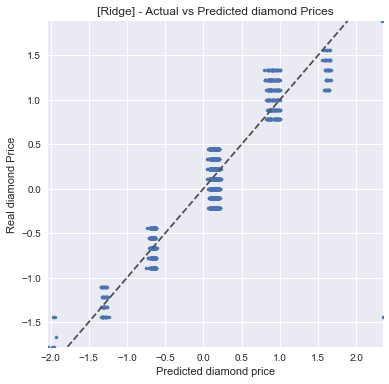

In [107]:
# Let's represent the preducted values vs the real values
plt.figure(figsize=(6, 6))

#Limits
maxlimit = pred_act_df['Real'].max()
minlimit = pred_act_df['Real'].min()
plt.xlim(-1, maxlimit)
plt.ylim(-1, maxlimit)

plt.scatter(pred_act_df['Predicted'], 
            pred_act_df['Real'], s=10)
plt.xlabel('Predicted diamond price')
plt.ylabel('Real diamond Price')

plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)

plt.plot([minlimit,maxlimit], [minlimit,maxlimit], ls="--", c=".3")
plt.title('[Ridge] - Actual vs Predicted diamond Prices')
plt.show()

# Model 2: Lasso Regression

In [108]:
clf_la = Lasso(alpha=0.0001) #alpha=1.0 by default
clf_la
clf_la.fit(X_train_multi, y_train_multi)

Lasso(alpha=0.0001)

In [109]:
pd.Series(clf_la.coef_, index=X_multi.columns)

fixed acidity           0.217924
volatile acidity        0.000860
citric acid            -0.000572
residual sugar          0.010719
chlorides              -0.005286
free sulfur dioxide    -0.003293
total sulfur dioxide    0.007799
water_cont             -0.035807
pH                     -0.001229
sulphates               0.002031
alcohol                -0.009734
quality                 0.614832
dtype: float64

In [110]:
# Visualitzation of the model performance

y_predLA = clf_la.predict(X_test_multi)

# Let's create a dataframe containing the real and predicted values_

y_pred_a = pd.DataFrame(y_predLA).reset_index(drop=True)
y_test_a = y_test_multi.reset_index(drop=True, inplace=False)

# We create a new dataframe containing both the real (y_test) and the predicted value by the model (y_pred)
pred_act_df = pd.concat([y_test_a,y_pred_a], axis=1)

In [111]:
pred_act_df.rename({'density': 'Real', 0: 'Predicted'}, 
                   axis=1, inplace=True)
pred_act_df

,Real,Predicted
0,-0.222222,0.142064
1,0.111111,0.123049
2,1.222222,0.810177
3,0.222222,0.158778
4,-0.888889,-0.647153
...,...,...
1592,-0.666667,-0.639339
1593,-0.555556,-0.671667
1594,-0.888889,-0.655974
1595,-0.555556,-0.669168


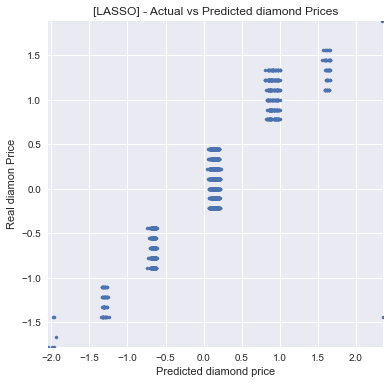

In [112]:
# Let's represent the preducted values vs the real House value
plt.figure(figsize=(6, 6))


plt.scatter(pred_act_df['Predicted'], 
            pred_act_df['Real'], s=10)

plt.xlabel('Predicted diamond price')
plt.ylabel('Real diamon Price')

plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)

plt.title('[LASSO] - Actual vs Predicted diamond Prices')
plt.show()

In [113]:
lasso_metrics = Allmetrics(clf_la, X_train_multi, y_train_multi, X_test_multi, y_test_multi)

## Visualizing R2-Score of Algorithms

In [114]:
rr_metrics.loc['Train','R2']

0.8957031012233782

In [115]:
lasso_metrics.loc['Train','R2']

0.8957067354309889

In [116]:
models = ['Ridge', 'Lasso']
R2_Scores = [rr_metrics.loc['Train','R2'], lasso_metrics.loc['Train','R2']]

In [117]:
compare = pd.DataFrame({'Algorithms' : models , 'R2-Scores' : R2_Scores})
compare.sort_values(by='R2-Scores' ,ascending=False)

,Algorithms,R2-Scores
1,Lasso,0.895707
0,Ridge,0.895703
